# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rifqi Sirojul Muzhoffar
- **Email:** rmuzhoffar@gmail.com
- **ID Dicoding:** rmuzhoffar

## Menentukan Pertanyaan Bisnis

1. Bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) mempengaruhi jumlah total penyewaan sepeda?
2. Apa perbedaan penggunaan sepeda antara pengguna *casual* dan *registered* di berbagai musim?
3. Bagaimana fluktuasi permintaan penyewaan sepeda pada hari kerja vs akhir pekan, dan hari libur vs hari biasa?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
day_df = pd.read_csv('https://raw.githubusercontent.com/Muzhoffar/bike-sharing/refs/heads/main/data/day.csv')

# Menampilkan beberapa baris awal dari tabel day
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel hour
hour_df = pd.read_csv('https://raw.githubusercontent.com/Muzhoffar/bike-sharing/refs/heads/main/data/hour.csv')

# Menampilkan beberapa baris awal dari tabel hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- File `day.csv` menyediakan data harian terkait penyewaan sepeda, termasuk cuaca, musim, dan tipe pengguna.
- File `hour.csv` menyediakan data serupa tetapi dengan agregasi per jam.
- Beberapa nama kolom pada kedua dataset dapat diperbaiki agar lebih deskriptif.

### Assessing Data

#### Memeriksa tipe data dan memeriksa nilai yang hilang di kedua dataset

In [4]:
# Memeriksa tipe data dari tiap kolom yang terdapat pada tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Memeriksa tipe data dari tiap kolom yang terdapat pada tabel hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Memeriksa missing value di kedua dataset

In [6]:
# Memeriksa missing value di tabel day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# Memeriksa missing value di tabel hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


#### Memeriksa duplikasi data dan menampilkan ringkasan parameter statistik dari kedua dataset

In [8]:
# Memeriksa duplikasi data di tabel day_df
print("Jumlah duplikasi data tabel day_df: ", day_df.duplicated().sum())

# Menampilkan ringkasan parameter statistik dari tabel day_df
day_df.describe()

Jumlah duplikasi data tabel day_df:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Memeriksa duplikasi data di tabel hour_df
print("Jumlah duplikasi data tabel hour_df: ", hour_df.duplicated().sum())

# Menampilkan ringkasan parameter statistik dari tabel hour_df
hour_df.describe()

Jumlah duplikasi data tabel hour_df:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom `dteday` disimpan sebagai tipe objek (string) dan harus diubah ke format datetime untuk analisis yang lebih baik.
- Tidak ada *missing value* di tabel `day_df` dan `hour_df`
- Tidak ada data yang *duplicate* di tabel `day_df` dan `hour_df`
- Tidak ada kejanggalan pada parameter statistik dari tabel `day_df` dan `hour_df`
- Mengganti beberapa judul kolom untuk membuatnya lebih deskriptif.

### Cleaning Data

#### Mengganti beberapa judul kolom pada kedua dataset agar lebih deskriptif.

In [10]:
# Mengganti nama kolom pada day_df
day_df.rename(columns={
    'dteday': 'date_time',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count',
    'temp': 'temperature',
    'hum': 'humidity',
    'weathersit': 'weather'
}, inplace=True)

# Mengganti nama kolom pada hour_df
hour_df.rename(columns={
    'dteday': 'date_time',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count',
    'temp': 'temperature',
    'hum': 'humidity',
    'weathersit': 'weather'
}, inplace=True)

#### Mengubah kolom `date_time` ke format datetime di kedua dataset

In [11]:
# Mengubah tipe data kolom 'date_time' ke format datetime di dataset day
day_df['date_time'] = pd.to_datetime(day_df['date_time'])

# Memverifikasi konversi
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date_time    731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weather      731 non-null    int64         
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: datet

In [12]:
# Mengubah tipe data kolom 'date_time' ke format datetime di dataset hour
hour_df['date_time'] = pd.to_datetime(hour_df['date_time'])

# Memverifikasi konversi
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date_time    17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   month        17379 non-null  int64         
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weather      17379 non-null  int64         
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

**Insight:**
- Nama beberapa kolom seperti `dteday`, `yr`, `mnth`, dan `cnt` telah diganti menjadi lebih deskriptif.
- Tipe data kolom `date_time` (sebelumnya `dteday`) berhasil diubah ke format datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

Pengaruh kondisi cuaca terhadap total penyewaan sepeda

In [13]:
# Membuat bin untuk suhu, kelembaban, dan kecepatan angin
temperature_bins = pd.cut(day_df['temperature'],
                          bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
                          labels=['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas'])
humidity_bins = pd.cut(day_df['humidity'],
                       bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
                       labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
windspeed_bins = pd.cut(day_df['windspeed'],
                        bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
                        labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# Mengelompokkan berdasarkan bin dan menghitung rata-rata penyewaan
temperature_group = day_df.groupby(temperature_bins, observed=False)['count'].mean()
humidity_group = day_df.groupby(humidity_bins, observed=False)['count'].mean()
windspeed_group = day_df.groupby(windspeed_bins, observed=False)['count'].mean()

# Menampilkan hasil
print('Rata-rata penyewaan sepeda berdasarkan suhu:')
for temp, count in temperature_group.items():
    print(f"{temp:<15} : {count:7.2f}")

print('\nRata-rata penyewaan sepeda berdasarkan kelembaban:')
for hum, count in humidity_group.items():
    print(f"{hum:<15} : {count:7.2f}")

print('\nRata-rata penyewaan sepeda berdasarkan kecepatan angin:')
for wind, count in windspeed_group.items():
    print(f"{wind:<15} : {count:7.2f}")

Rata-rata penyewaan sepeda berdasarkan suhu:
Sangat Dingin   : 1543.24
Dingin          : 3178.55
Sedang          : 5011.21
Hangat          : 5714.34
Panas           : 4765.31

Rata-rata penyewaan sepeda berdasarkan kelembaban:
Sangat Rendah   : 1635.00
Rendah          : 4454.43
Sedang          : 4601.18
Tinggi          : 4760.15
Sangat Tinggi   : 3404.17

Rata-rata penyewaan sepeda berdasarkan kecepatan angin:
Sangat Rendah   : 4830.35
Rendah          : 4054.43
Sedang          : 3008.89
Tinggi          :     nan
Sangat Tinggi   :     nan


Perbedaan antara pengguna casual dan terdaftar di berbagai musim

In [14]:
# Buat mapping untuk season
season_mapping = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}

# Mengelompokkan data berdasarkan season dan menghitung rata-rata untuk 'casual' dan 'registered'
season_group = day_df.groupby('season')[['casual', 'registered']].mean().reset_index()

# Terapkan mapping ke kolom 'season'
season_group['season'] = season_group['season'].map(season_mapping)

# Menampilkan hasil
display(season_group)

,season,casual,registered
0,Musim Semi,334.928177,2269.204420
1,Musim Panas,1106.097826,3886.233696
2,Musim Gugur,1202.611702,4441.691489
3,Musim Dingin,729.112360,3999.050562


Permintaan penyewaan sepeda pada hari kerja vs akhir pekan, dan hari libur vs hari biasa

In [15]:
# Mengelompokkan data untuk weekday (hari kerja vs akhir pekan)
day_type = day_df['weekday'].apply(lambda x: 'Hari Kerja' if x in [1, 2, 3, 4, 5] else 'Akhir Pekan')
day_type_group = day_df.groupby(day_type)['count'].mean()

# Mengelompokkan data untuk holiday (hari biasa vs hari libur)
holiday_group = day_df.groupby('holiday')['count'].mean()

# Mengubah indeks holiday_group menjadi status libur atau tidak
holiday_group.index = ['Hari Biasa', 'Hari Libur']

# Menampilkan hasil
print("Permintaan penyewaan sepeda pada hari kerja dan akhir pekan:")
for day_type, count in day_type_group.items():
    print(f"{day_type:<12} : {count:7.2f}")

print("\nPermintaan penyewaan sepeda pada hari libur dan hari biasa:")
for holiday_status, count in holiday_group.items():
    print(f"{holiday_status:<12} : {count:7.2f}")

Permintaan penyewaan sepeda pada hari kerja dan akhir pekan:
Akhir Pekan  : 4389.69
Hari Kerja   : 4550.57

Permintaan penyewaan sepeda pada hari libur dan hari biasa:
Hari Biasa   : 4527.10
Hari Libur   : 3735.00


**Insight:**
- Kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda. Suhu hangat dan sedang adalah kondisi terbaik, di mana penyewaan sepeda meningkat secara signifikan. Sebaliknya, suhu sangat dingin atau panas mengurangi minat pengguna untuk menyewa sepeda.
- Kelembaban yang sedang menunjukkan peningkatan dalam jumlah penyewaan, sedangkan kelembaban sangat rendah atau sangat tinggi menurunkan penyewaan sepeda, menunjukkan bahwa pengguna lebih nyaman menyewa sepeda dalam kondisi cuaca yang stabil.
- Kecepatan angin yang rendah, atau tenang, juga meningkatkan minat penyewaan sepeda, sementara kecepatan angin yang tinggi atau kencang cenderung mengurangi penyewaan sepeda secara signifikan.
- Pengguna casual lebih cenderung menyewa sepeda pada musim panas dan musim gugur, sementara pengguna registered memiliki pola yang lebih stabil sepanjang tahun, dengan sedikit peningkatan selama musim gugur. Musim dingin menunjukkan penurunan tajam dalam jumlah penyewaan sepeda, terutama untuk pengguna casual.
- Penyewaan sepeda sedikit lebih tinggi pada hari kerja (4550) dibandingkan dengan akhir pekan (4389), yang menunjukkan permintaan lebih tinggi untuk bepergian selama hari kerja.
- Penyewaan sepeda jauh lebih rendah pada hari libur (3735) dibandingkan dengan hari biasa (4527), yang menunjukkan berkurangnya permintaan sewa pada hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) mempengaruhi jumlah total penyewaan sepeda?

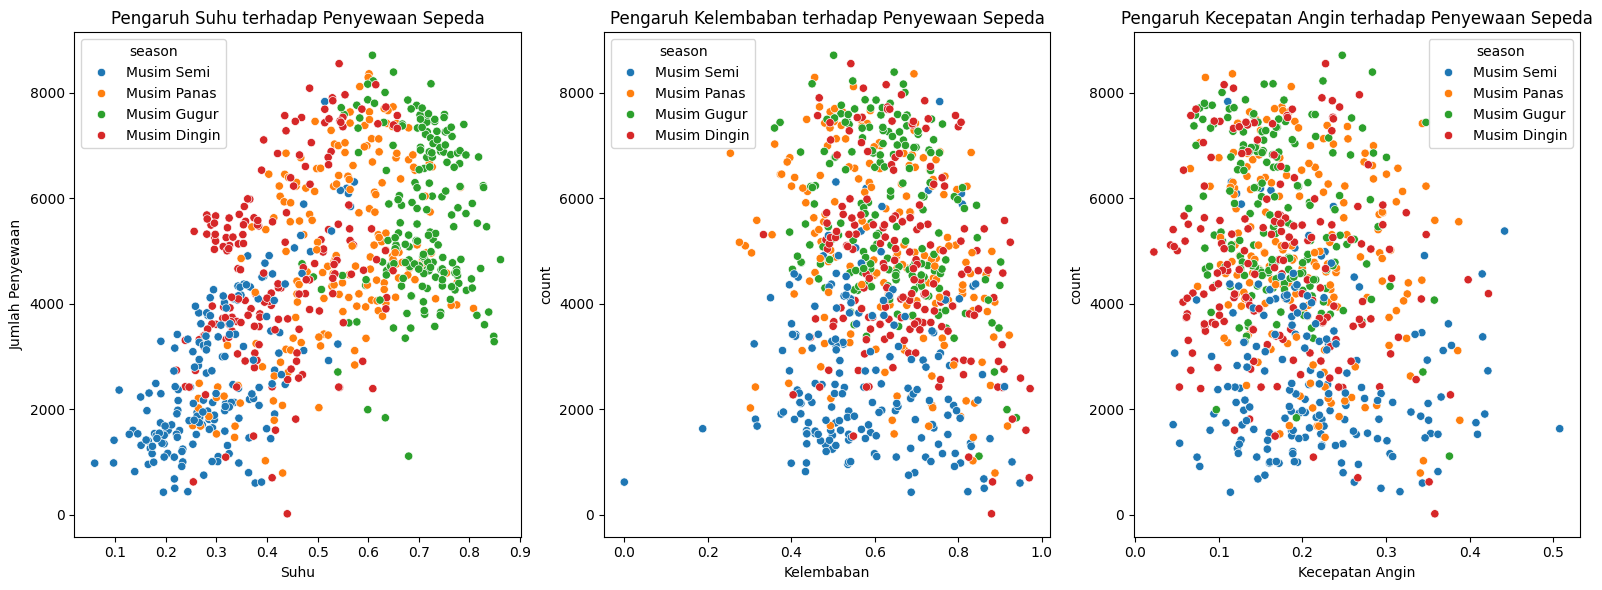

In [16]:
# Menerapkan mapping ke kolom 'season'
day_df['season'] = day_df['season'].map(season_mapping)

# Scatter plot untuk suhu
plt.figure(figsize=(16, 6))

# Scatter plot untuk suhu
plt.subplot(1, 3, 1)
sns.scatterplot(x='temperature', y='count', data=day_df, hue='season')
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')

# Scatter plot untuk kelembaban
plt.subplot(1, 3, 2)
sns.scatterplot(x='humidity', y='count', data=day_df, hue='season')
plt.title('Pengaruh Kelembaban terhadap Penyewaan Sepeda')
plt.xlabel('Kelembaban')

# Scatter plot untuk kecepatan angin
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='count', data=day_df, hue='season')
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')

plt.tight_layout()
plt.show()


### Pertanyaan 2: Apa perbedaan penggunaan sepeda antara pengguna *casual* dan *registered* di berbagai musim?

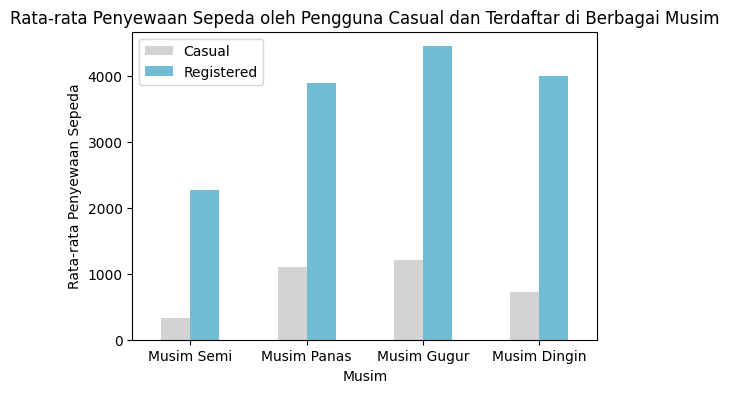

In [17]:
# 2. Visualisasi untuk Pengguna Casual vs Registered Berdasarkan Musim
season_group.plot(kind='bar', figsize=(6, 4), color=['#D3D3D3', '#72BCD4'])
plt.title('Rata-rata Penyewaan Sepeda oleh Pengguna Casual dan Terdaftar di Berbagai Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'], rotation=0)
plt.legend(["Casual", "Registered"])
plt.show()

### Pertanyaan 3: Bagaimana fluktuasi permintaan penyewaan sepeda pada hari kerja vs akhir pekan, dan hari libur vs hari biasa?

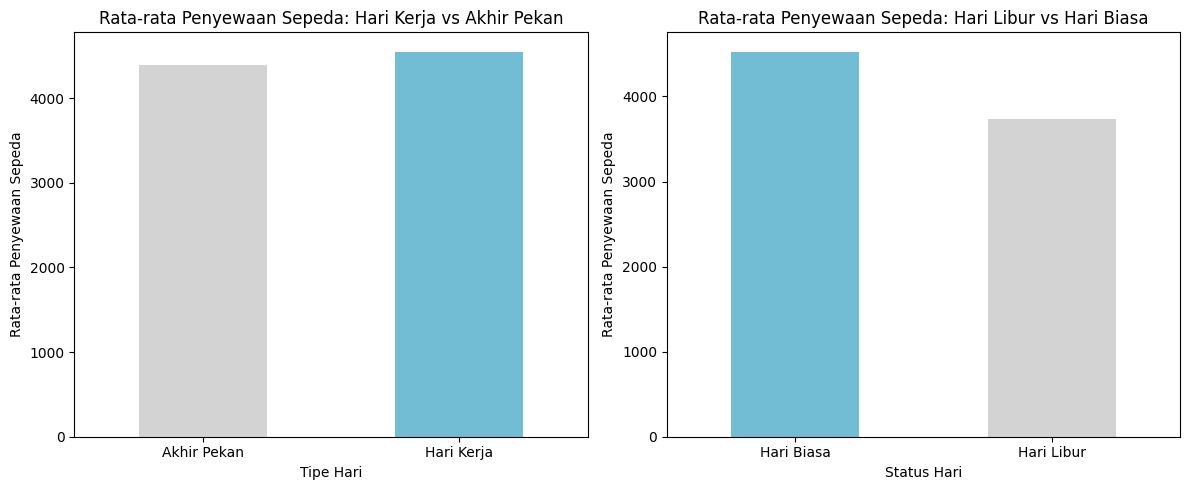

In [18]:
# 3. Visualisasi Permintaan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan dan Hari Libur vs Hari Biasa
plt.figure(figsize=(12, 5))

# Penyewaan di Hari Kerja vs Akhir Pekan
plt.subplot(1, 2, 1)
day_type_group.plot(kind='bar', color=['#D3D3D3', '#72BCD4'])
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=0)

# Penyewaan di Hari Libur vs Hari Biasa
plt.subplot(1, 2, 2)
holiday_group.plot(kind='bar', color=['#72BCD4', '#D3D3D3'])
plt.title('Rata-rata Penyewaan Sepeda: Hari Libur vs Hari Biasa')
plt.xlabel('Status Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Insight:**
- Analisis visual menunjukkan bahwa suhu, kelembaban, dan kecepatan angin sangat mempengaruhi pola penyewaan sepeda. Grafik scatter plot memperlihatkan bahwa suhu hangat dan kelembaban serta angin yang sedang merupakan kondisi optimal bagi pengguna untuk menyewa sepeda.
- Pengguna casual menyewa sepeda lebih banyak pada musim panas dan musim gugur, dengan pola yang jelas terlihat melalui visualisasi bar plot. Sebaliknya, pengguna registered tetap aktif sepanjang tahun, dengan peningkatan penyewaan pada musim gugur.
- Rata-rata penyewaan sepeda sedikit lebih tinggi pada hari kerja dibandingkan akhir pekan. Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan sehari-hari.
- Rata-rata penyewaan sepeda lebih rendah pada hari libur dibandingkan hari biasa. Hal ini mengindikasikan penurunan aktivitas atau kebutuhan transportasi pada hari libur, kemungkinan karena lebih banyak orang libur dan tidak memerlukan transportasi rutin.

## Analisis Lanjutan (Opsional)

### Clustering Menggunakan Manual Grouping
Dalam analisis ini, saya akan melakukan pengelompokan manual berdasarkan variabel cuaca dan penggunaan sepeda.
Saya akan mengelompokkan data menjadi 3 kategori:
1. Penggunaan Rendah: Ketika jumlah total penyewaan (count) rendah.
2. Penggunaan Sedang: Ketika jumlah total penyewaan (count) sedang.
3. Penggunaan Tinggi: Ketika jumlah total penyewaan (count) tinggi.

In [19]:
# Definisikan ambang batas untuk jumlah penyewaan sepeda
low_usage = day_df['count'].quantile(0.33)
high_usage = day_df['count'].quantile(0.67)

# Fungsi untuk mengelompokkan berdasarkan tingkat penggunaan sepeda
def categorize_usage(count):
    if count <= low_usage:
        return 'Penggunaan Rendah'
    elif count <= high_usage:
        return 'Penggunaan Sedang'
    else:
        return 'Penggunaan Tinggi'

# Terapkan fungsi untuk mengelompokkan data
day_df['usage_category'] = day_df['count'].apply(categorize_usage)

# Lihat distribusi kategori penggunaan
day_df['usage_category'].value_counts()

,count
usage_category,
Penggunaan Sedang,249
Penggunaan Rendah,241
Penggunaan Tinggi,241


### Eksplorasi Lebih Lanjut Berdasarkan Kategori Penggunaan

In [20]:
# Melihat rata-rata suhu, kelembaban, dan kecepatan angin di setiap kategori penggunaan.
usage_weather_group = day_df.groupby('usage_category')[['temperature', 'humidity', 'windspeed']].mean()
display(usage_weather_group)

,temperature,humidity,windspeed
usage_category,,,
Penggunaan Rendah,0.333137,0.633098,0.214307
Penggunaan Sedang,0.554078,0.643230,0.182661
Penggunaan Tinggi,0.596991,0.606845,0.174749


### Visualisasi Kategori Penggunaan Berdasarkan Kondisi Cuaca

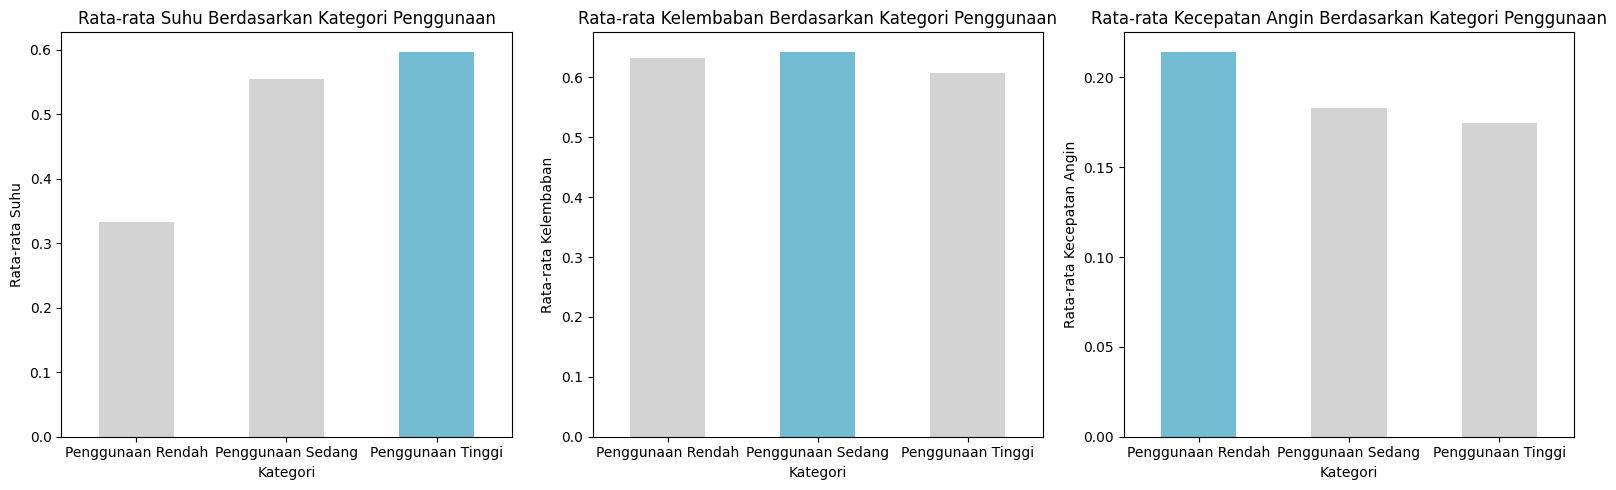

In [21]:
plt.figure(figsize=(16, 5))

# Rata-rata Suhu Berdasarkan Kategori Penggunaan
plt.subplot(1, 3, 1)
usage_weather_group['temperature'].plot(kind='bar', color=['#D3D3D3', '#D3D3D3', '#72BCD4'])
plt.title('Rata-rata Suhu Berdasarkan Kategori Penggunaan')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Suhu')
plt.xticks(rotation=0)

# Rata-rata Kelembaban Berdasarkan Kategori Penggunaan
plt.subplot(1, 3, 2)
usage_weather_group['humidity'].plot(kind='bar', color=['#D3D3D3', '#72BCD4', '#D3D3D3'])
plt.title('Rata-rata Kelembaban Berdasarkan Kategori Penggunaan')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Kelembaban')
plt.xticks(rotation=0)

# Rata-rata Kecepatan Angin Berdasarkan Kategori Penggunaan
plt.subplot(1, 3, 3)
usage_weather_group['windspeed'].plot(kind='bar', color=['#72BCD4', '#D3D3D3', '#D3D3D3'])
plt.title('Rata-rata Kecepatan Angin Berdasarkan Kategori Penggunaan')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Kecepatan Angin')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Insight:**
- Pengelompokan berdasarkan jumlah penyewaan sepeda menunjukkan bahwa cuaca hangat dengan kelembaban sedang dan angin yang tenang cenderung meningkatkan jumlah penyewaan sepeda.
- Kondisi ekstrem seperti suhu yang sangat dingin, kelembaban yang sangat rendah atau tinggi, serta kecepatan angin yang tinggi, semuanya berkontribusi pada penurunan penggunaan sepeda.
- Manual grouping ini memberikan wawasan tentang bagaimana faktor cuaca tertentu dapat dikelompokkan untuk memprediksi tingkat penggunaan sepeda, dan dapat membantu dalam pengambilan keputusan operasional untuk meningkatkan layanan penyewaan sepeda selama kondisi cuaca yang optimal.

## Conclusion

####1. Bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) mempengaruhi jumlah total penyewaan sepeda?

- Suhu: Penyewaan sepeda meningkat ketika suhu lebih hangat, dengan suhu "sedang" hingga "hangat" menunjukkan jumlah penyewaan tertinggi. Ketika suhu sangat dingin atau sangat panas, jumlah penyewaan menurun. Penyewaan sepeda tertinggi terjadi saat suhu "hangat", yaitu sekitar 5714 penyewaan per hari.
- Kelembaban: Kelembaban yang "rendah" hingga "tinggi" memiliki dampak yang cukup serupa, dengan penyewaan tertinggi pada kelembaban "tinggi" sekitar 4760 penyewaan per hari. Namun, kelembaban yang "sangat rendah" atau "sangat tinggi" cenderung menurunkan jumlah penyewaan.
- Kecepatan Angin: Kecepatan angin yang "sangat rendah" hingga "sedang" cenderung menunjukkan lebih banyak penyewaan, dengan jumlah penyewaan tertinggi pada kecepatan angin yang "sangat rendah" (4830 penyewaan). Pada kecepatan angin yang lebih tinggi, jumlah penyewaan menurun.

####2. Apa perbedaan penggunaan sepeda antara pengguna casual dan registered di berbagai musim?

Penggunaan sepeda oleh pengguna casual dan registered menunjukkan variasi yang signifikan di berbagai musim:

- Pengguna casual: Penggunaan tertinggi terjadi selama musim gugur (1202 sepeda/hari), diikuti oleh musim panas. Penggunaan terendah oleh pengguna casual adalah di musim semi.
- Pengguna registered: Penggunaan terdaftar stabil sepanjang musim, dengan musim gugur menunjukkan puncak penggunaan (4441 sepeda/hari). Penggunaan terendah adalah di musim semi (2269 sepeda/hari).

Secara umum, pengguna registered menggunakan sepeda lebih konsisten sepanjang tahun, sedangkan pengguna casual cenderung lebih bervariasi, dengan peningkatan yang signifikan selama musim panas dan gugur.

####3. Bagaimana fluktuasi permintaan penyewaan sepeda pada hari kerja vs akhir pekan, dan hari libur vs hari biasa?

- Hari kerja vs akhir pekan: Rata-rata permintaan penyewaan sepeda pada hari kerja adalah 4550 penyewaan, sedangkan pada akhir pekan adalah 4389 penyewaan. Ini menunjukkan bahwa meskipun permintaan sedikit lebih tinggi pada hari kerja, perbedaan antara hari kerja dan akhir pekan tidak terlalu signifikan, dengan selisih sekitar 160 penyewaan per hari.
- Hari libur vs hari biasa: Rata-rata permintaan pada hari biasa adalah 4527 penyewaan, sedangkan pada hari libur lebih rendah, yaitu 3735 penyewaan. Ini mengindikasikan bahwa pada hari libur, permintaan penyewaan sepeda menurun secara signifikan dibandingkan hari-hari biasa, dengan penurunan sekitar 800 penyewaan.

Perbedaan ini menunjukkan bahwa pengguna sepeda lebih aktif pada hari-hari kerja dan hari biasa, mungkin karena kebutuhan transportasi rutin atau kegiatan harian.